<a href="https://colab.research.google.com/github/salmansrizon/Python_Examples/blob/master/Text%20Generation%20with%20Python%20and%20TensorFlow(Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text Generation with Python and TensorFlow(Keras)

---

Now a days matchine learning is doing a lot of stuff. Narural language processing is one of them. In this article I wanted to  apply a diffrent approch to take this on a new lavel. We are all familier with [google news](https://news.google.com/)  a platform where we can get location based personalized news headlines. This has became a very importent and usefull platform for all online news readers. Generating news headline among these headlines will be more fun to see. So I tried to implement my little knowledge to do this. There is a lot of ways to get the job done in any ml project. As a lazzy person I started googling the stortest ways. Like as always google didn't disappoint me. 


Here in this experiment I used mainly [NLTK](https://www.nltk.org/) & [Keras](https://keras.io/). Also I followed numeras articles , stackoverflow answers and google seach results. Considering this I will dedicate this experient to google and stackoverflow. 


> I will try to describe useful topics depends on relevent steps and activity
 





Here is the resoures I follwed during the process 




*  Google News API: https://github.com/nikhilkumarsingh/gnewsclient
*  Sentence generating with keras: https://stackabuse.com/text-generation-with-python-and-tensorflow-keras/


Let's get started...


> Installing required module for the experiment.

In [0]:
!pip install gnewsclient
!pip install python-Levenshtein
!pip install nltk

In [0]:
from gnewsclient import gnewsclient
import pandas as pd
import json
from pandas.io.json import json_normalize

For this experiment I used Bangladeshi top national news in english language. If you want to use your personal configaration here is some usefull methods for this api


*   `client.locations` - will show the available location for the news. (ex: 'Australia', 'Botswana', 'Canada ', 'Ethiopia')
*   `client.languages` - will show the available languages for the news (ex: 'english', 'indonesian', 'czech', 'german' )
*  `client.topics` -  will show the available topics for the news (ex: 'Top Stories',
 'World',
 'Nation',
 'Business',
 'Technology',
 'Entertainment',
 'Sports',
 'Science',
 'Health')



In [0]:
client = gnewsclient.NewsClient(language='en', location='Bangladesh', topic='Nation', max_results=100)
# client.topics
data = client.get_news()



> Converting API responce to a pandas dataframe



In [5]:
data = pd.DataFrame(data)
data.head(5)

,title,link,media
0,Bangladesh Suppliers Barely Afloat As Clothing...,https://news.google.com/__i/rss/rd/articles/CB...,None
1,Bangladesh quarantines hundreds of Rohingya re...,https://news.google.com/__i/rss/rd/articles/CB...,None
2,Clay layers and distant pumping trigger arseni...,https://news.google.com/__i/rss/rd/articles/CB...,None
3,"Bangladesh cartoonist, writer charged for anti...",https://news.google.com/__i/rss/rd/articles/CB...,None
4,Bangladesh Sends 28 Rohingya Refugees To Cyclo...,https://news.google.com/__i/rss/rd/articles/CB...,None


> Spliting the title in to headline and News source

In [6]:
data[['headline','Source']] = data['title'].str.split(" - ",n=1,expand=True)
data.head(5)

,title,link,media,headline,Source
0,Bangladesh Suppliers Barely Afloat As Clothing...,https://news.google.com/__i/rss/rd/articles/CB...,None,Bangladesh Suppliers Barely Afloat As Clothing...,Forbes
1,Bangladesh quarantines hundreds of Rohingya re...,https://news.google.com/__i/rss/rd/articles/CB...,None,Bangladesh quarantines hundreds of Rohingya re...,Al Jazeera English
2,Clay layers and distant pumping trigger arseni...,https://news.google.com/__i/rss/rd/articles/CB...,None,Clay layers and distant pumping trigger arseni...,Phys.org
3,"Bangladesh cartoonist, writer charged for anti...",https://news.google.com/__i/rss/rd/articles/CB...,None,"Bangladesh cartoonist, writer charged for anti...",Al Jazeera English
4,Bangladesh Sends 28 Rohingya Refugees To Cyclo...,https://news.google.com/__i/rss/rd/articles/CB...,None,Bangladesh Sends 28 Rohingya Refugees To Cyclo...,NPR


 > Taking only headline coloumn for next step

In [7]:
headlines = data['headline']
headlines.head(5)

0    Bangladesh Suppliers Barely Afloat As Clothing...
1    Bangladesh quarantines hundreds of Rohingya re...
2    Clay layers and distant pumping trigger arseni...
3    Bangladesh cartoonist, writer charged for anti...
4    Bangladesh Sends 28 Rohingya Refugees To Cyclo...
Name: headline, dtype: object

### Sentiment analysis for the headlines

In this step I will try to understand the sentiments of the news headline with NLTK's `SentimentIntensityAnalyzer` module. Mian goal in this step is to fregment the sentiments into positive, nutral & negative.

> Impoting the necessery module and libraries

In [8]:
from pprint import pprint
import numpy as np
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid', context='talk', palette = 'Dark2')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


> printing out the polarity score for each headline. 

Quantify the sentiments with a positive or negative value is called polarity.

In [9]:
sia = SIA()
results = []
for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)
    
pprint(results[:10], width= 100)

[{'compound': 0.0,
  'headline': 'Bangladesh Suppliers Barely Afloat As Clothing Brands Find New Ways To Squeeze Them',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4215,
  'headline': 'Bangladesh quarantines hundreds of Rohingya rescued from sea',
  'neg': 0.0,
  'neu': 0.714,
  'pos': 0.286},
 {'compound': 0.0,
  'headline': 'Clay layers and distant pumping trigger arsenic contamination in Bangladesh '
              'groundwater',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.2023,
  'headline': 'Bangladesh cartoonist, writer charged for anti-government posts',
  'neg': 0.231,
  'neu': 0.769,
  'pos': 0.0},
 {'compound': -0.4215,
  'headline': 'Bangladesh Sends 28 Rohingya Refugees To Cyclone-Prone Island Over COVID-19 Fears',
  'neg': 0.219,
  'neu': 0.781,
  'pos': 0.0},
 {'compound': -0.4404,
  'headline': '“Extraction”, a thriller set in Dhaka, has angered Bangladeshis',
  'neg': 0.308,
  'neu': 0.561,
  'pos': 0.131},
 {'compound': -0.3612,
  'headlin

In [10]:
sentiments = pd.DataFrame.from_records(results)
sentiments.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Bangladesh Suppliers Barely Afloat As Clothing...
1,0.000,0.714,0.286,0.4215,Bangladesh quarantines hundreds of Rohingya re...
2,0.000,1.000,0.000,0.0000,Clay layers and distant pumping trigger arseni...
3,0.231,0.769,0.000,-0.2023,"Bangladesh cartoonist, writer charged for anti..."
4,0.219,0.781,0.000,-0.4215,Bangladesh Sends 28 Rohingya Refugees To Cyclo...


> Labeling the polarity score in a range between (-1 to 1) for normalization

In [11]:
sentiments['label'] = 0
sentiments.loc[sentiments['compound'] > 0.1, 'label'] = 1
sentiments.loc[sentiments['compound'] > -0.2, 'label'] = -1
sentiments.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Bangladesh Suppliers Barely Afloat As Clothing...,-1
1,0.000,0.714,0.286,0.4215,Bangladesh quarantines hundreds of Rohingya re...,-1
2,0.000,1.000,0.000,0.0000,Clay layers and distant pumping trigger arseni...,-1
3,0.231,0.769,0.000,-0.2023,"Bangladesh cartoonist, writer charged for anti...",0
4,0.219,0.781,0.000,-0.4215,Bangladesh Sends 28 Rohingya Refugees To Cyclo...,0


In [12]:
sentiments.label.value_counts()

-1    22
 0    20
Name: label, dtype: int64

> Showing the negative headlines

As the majority of headlines showed negative so wanted to check the headlines manually

In [13]:
print("Negative headlines:\n")
pprint(list(sentiments[sentiments['label'] == -1].headline)[:100], width = 200)

Negative headlines:

['Bangladesh Suppliers Barely Afloat As Clothing Brands Find New Ways To Squeeze Them',
 'Bangladesh quarantines hundreds of Rohingya rescued from sea',
 'Clay layers and distant pumping trigger arsenic contamination in Bangladesh groundwater',
 "Bangladesh's Beximco to begin producing Covid-19 drug remdesivir",
 "Rohingya refugees sent to 'flood-prone' island off Bangladesh",
 'Why These Bangladeshi Women Artists Are Using Creativity To Combat Covid-19',
 'Bangladesh overfishing: Almost all species pushed to brink',
 'Dozens of stranded Rohingya refugees land in Bangladesh',
 'Bangladesh begins production of experimental COVID-19 drug remdesivir',
 'Nearly 400 Rohingya Rescued From Boat Near Bangladesh After 2 Months Adrift',
 'Diaspora offers helping hand as Bangladesh reels from coronavirus',
 'Music of Bangladesh: A playlist of rock, fusion and hip-hop from the neighbouring country',
 'Life or livelihood: Bangladesh shop owners face difficult decisions before E

persenge value of polarity ranges

In [14]:
sentiments.label.value_counts(normalize=True) * 100

-1    52.380952
 0    47.619048
Name: label, dtype: float64

> Determing Word frequency Distribution and Tokenization



*   Word frequency distribution determins how frequently a word used in the this data set. By this we can find out the most populer word in the headlines.
*   On the other hand Tokenizer Tokenize the words (example is given below). This breaks out the sentence into word level and tokenize each words. 





In [15]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('punkt')
example = "Clay layers and distant pumping trigger arsenic contamination in Bangladesh groundwater"
print(word_tokenize(example, language = 'english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Clay', 'layers', 'and', 'distant', 'pumping', 'trigger', 'arsenic', 'contamination', 'in', 'Bangladesh', 'groundwater']


>Tokenaze the regular expressions 

In [16]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['Clay', 'layers', 'and', 'distant', 'pumping', 'trigger', 'arsenic', 'contamination', 'in', 'Bangladesh', 'groundwater']


`Stop Words:`  - a stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[:5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we']


Process the tokenize & ranking the most common used words

In [18]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
        
    return tokens
pos_lines = list(sentiments[sentiments.label == -1].headline)
pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

common_word = pd.DataFrame(pos_freq.most_common(5))
common_word

,0,1
0,bangladesh,20
1,rohingya,5
2,covid,4
3,19,4
4,suppliers,2


> Plotting the Word Frequence Distribution (Negative)

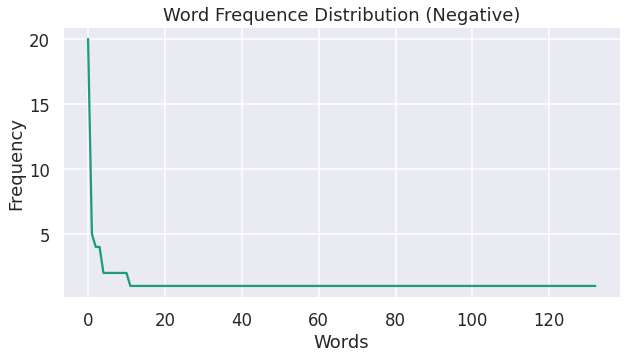

In [19]:
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize = (10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequence Distribution (Negative)")
plt.show()

After exploring the dataset we are now good to go for our next step. in this step I will try to generate meaningfulll sentence segments with the help of metchine learning

> Importing Keras

Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML.Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. It was developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System), and its primary author and maintainer is François Chollet, a Google engineer. Chollet also is the author of the XCeption deep neural network model.click here to read [more](https://en.wikipedia.org/wiki/Keras).

In [20]:
import numpy
import sys
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


> Loading Headlines as a Test data for ml model

In [25]:
test_data = str(sentiments['headline'])
test_data

"0     Bangladesh Suppliers Barely Afloat As Clothing...\n1     Bangladesh quarantines hundreds of Rohingya re...\n2     Clay layers and distant pumping trigger arseni...\n3     Bangladesh cartoonist, writer charged for anti...\n4     Bangladesh Sends 28 Rohingya Refugees To Cyclo...\n5     “Extraction”, a thriller set in Dhaka, has ang...\n6     NYC's Bangladeshi community struggles to cope ...\n7     Bangladesh's Beximco to begin producing Covid-...\n8     Coronavirus: Two million Bangladesh jobs 'at r...\n9     Bangladeshi garment workers face ruin as globa...\n10    Rohingya refugees sent to 'flood-prone' island...\n11    Why These Bangladeshi Women Artists Are Using ...\n12    Bangladeshi journalist is jailed after mysteri...\n13    100,000 gather for funeral in Bangladesh, defy...\n14    Bangladesh overfishing: Almost all species pus...\n15    Dozens of stranded Rohingya refugees land in B...\n16    Bangladesh sends food aid to brothels as women...\n17    Sheikh Mujibur Rahman: A

> Initiate tokenizer for test data 


In [0]:
def tokenize_words(input):
    # lowercase everything to standardize it
    input = input.lower()

    # instantiate the tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(input)

    # if the created token isn't in the stop words, make it part of "filtered"
    filtered = filter(lambda token: token not in stopwords.words('english'), tokens)
    return " ".join(filtered)

In [27]:
# preprocess the input data, make tokens
processed_inputs = tokenize_words(test_data)
processed_inputs

'0 Bangladesh Suppliers Barely Afloat As Clothing 1 Bangladesh quarantines hundreds Rohingya 2 Clay layers distant pumping trigger arseni 3 Bangladesh cartoonist writer charged anti 4 Bangladesh Sends 28 Rohingya Refugees To Cyclo 5 Extraction thriller set Dhaka ang 6 NYC Bangladeshi community struggles cope 7 Bangladesh Beximco begin producing Covid 8 Coronavirus Two million Bangladesh jobs r 9 Bangladeshi garment workers face ruin globa 10 Rohingya refugees sent flood prone island 11 Why These Bangladeshi Women Artists Are Using 12 Bangladeshi journalist jailed mysteri 13 100 000 gather funeral Bangladesh defy 14 Bangladesh overfishing Almost species pus 15 Dozens stranded Rohingya refugees land B 16 Bangladesh sends food aid brothels women 17 Sheikh Mujibur Rahman Army officer hanged 18 Bangladesh begins production experimental C 19 Primark Matalan among retailers allegedly 20 Raffael Ahsan Extraction story The lone Ban 21 Nearly 400 Rohingya Rescued From Boat Near Ban 22 Diaspora o

After tokenize the headlines in to cheracter lavel we can see that which cheracter used how many time in those headlines

In [28]:
chars = sorted(list(set(processed_inputs)))
# appending on a dictionary
char_to_num = dict((c, i) for i, c in enumerate(chars))
char_to_num

{' ': 0,
 '0': 1,
 '1': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 '5': 6,
 '6': 7,
 '7': 8,
 '8': 9,
 '9': 10,
 'A': 11,
 'B': 12,
 'C': 13,
 'D': 14,
 'E': 15,
 'F': 16,
 'H': 17,
 'I': 18,
 'L': 19,
 'M': 20,
 'N': 21,
 'P': 22,
 'R': 23,
 'S': 24,
 'T': 25,
 'U': 26,
 'W': 27,
 'Y': 28,
 'a': 29,
 'b': 30,
 'c': 31,
 'd': 32,
 'e': 33,
 'f': 34,
 'g': 35,
 'h': 36,
 'i': 37,
 'j': 38,
 'k': 39,
 'l': 40,
 'm': 41,
 'n': 42,
 'o': 43,
 'p': 44,
 'q': 45,
 'r': 46,
 's': 47,
 't': 48,
 'u': 49,
 'v': 50,
 'w': 51,
 'x': 52,
 'y': 53,
 'z': 54}

In [29]:
input_len = len(processed_inputs)
vocab_len = len(chars)
print ("Total number of characters:", input_len)
print ("Total vocab:", vocab_len)

Total number of characters: 1903
Total vocab: 55


Now that we've transformed the data into the form it needs to be in, we can begin making a dataset out of it, which we'll feed into our network. We need to define how long we want an individual sequence (one complete mapping of inputs characters as integers) to be. We'll set a length of 100 for now, and declare empty lists to store our input and output data:

In [0]:
seq_length = 100
x_data = []
y_data = []

Now we need to go through the entire list of inputs and convert the characters to numbers. We'll do this with a for loop. This will create a bunch of sequences where each sequence starts with the next character in the input data, beginning with the first character:

In [0]:
for i in range(0, input_len - seq_length, 1):
    # Define input and output sequences
    # Input is the current character plus desired sequence length
    in_seq = processed_inputs[i:i + seq_length]

    # Out sequence is the initial character plus total sequence length
    out_seq = processed_inputs[i + seq_length]

    # We now convert list of characters to integers based on
    # previously and add the values to our lists
    x_data.append([char_to_num[char] for char in in_seq])
    y_data.append(char_to_num[out_seq])

In [37]:
n_patterns = len(x_data)
print ("Total Patterns:", n_patterns)

Total Patterns: 5409


Now we'll go ahead and convert our input sequences into a processed numpy array that our network can use. We'll also need to convert the numpy array values into floats so that the sigmoid activation function our network uses can interpret them and output probabilities from 0 to 1

In [0]:
X = numpy.reshape(x_data, (n_patterns, seq_length, 1))
X = X/float(vocab_len)
# One Hot encoding
y = np_utils.to_categorical(y_data)

> Initalte keras model

For our job we used Long short-term memory (LSTM) . LSTM networks are a type of  [recurrent neural network (RNN)](https://en.wikipedia.org/wiki/Recurrent_neural_network) that uses special units in addition to standard units. RNN units include a 'memory cell' that can maintain information in memory for long periods of time. A set of gates is used to control when information enters the memory, when it's output, and when it's forgotten. This architecture lets them learn longer-term dependencies. GRUs are similar to LSTMs, but use a simplified structure. They also use a set of gates to control the flow of information, but they don't use separate memory cells, and they use fewer gates. You can also learn more from [here](https://towardsdatascience.com/understanding-lstm-and-its-quick-implementation-in-keras-for-sentiment-analysis-af410fd85b47) .

In [0]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

We compile the model now, and it is ready for training

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

Setting up a ceckpoint

In [0]:
filepath = "model_weights_saved.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
desired_callbacks = [checkpoint]

> Fit the model and let it train.



*   `epochs=20` -  Epochs means One Epoch is when an entire dataset is passed forward and backward through the neural network only once. For this situation the entire dataset will forword and backword 20 times through the nural network.
*   `batch_size=100` - Batch size is the total number of training examples present in a single batch. For this model we will pass 100 training data in every batch for training.

By tuning this parameters we can optimize the model's performance





In [88]:
history = model.fit(X, y, epochs=20, batch_size=100, callbacks=desired_callbacks)

Epoch 1/20
5409/5409 [==============================] - 125s 23ms/step - loss: 0.0432

Epoch 00001: loss did not improve from 0.03637
Epoch 2/20
5409/5409 [==============================] - 125s 23ms/step - loss: 0.0316

Epoch 00002: loss improved from 0.03637 to 0.03161, saving model to model_weights_saved.hdf5
Epoch 3/20
5409/5409 [==============================] - 127s 24ms/step - loss: 0.0310

Epoch 00003: loss improved from 0.03161 to 0.03103, saving model to model_weights_saved.hdf5
Epoch 4/20
5409/5409 [==============================] - 128s 24ms/step - loss: 0.0301

Epoch 00004: loss improved from 0.03103 to 0.03007, saving model to model_weights_saved.hdf5
Epoch 5/20
5409/5409 [==============================] - 132s 24ms/step - loss: 0.0266

Epoch 00005: loss improved from 0.03007 to 0.02656, saving model to model_weights_saved.hdf5
Epoch 6/20
5409/5409 [==============================] - 128s 24ms/step - loss: 0.0237

Epoch 00006: loss improved from 0.02656 to 0.02375, saving 

> Plotting the Loss value to understanding the tend

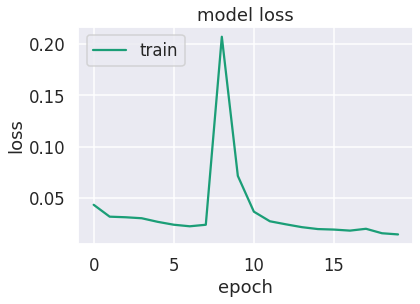

In [90]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

>Loading the trained model

In [0]:
filename = "model_weights_saved.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

Since we converted the characters to numbers earlier, we need to define a dictionary variable that will convert the output of the model back into numbers

In [0]:
num_to_char = dict((i, c) for i, c in enumerate(chars))

> For epoch = 20 and batch_size = 256

In [49]:
start = numpy.random.randint(0, len(x_data) - 1)
pattern = x_data[start]
print("Random Seed:")
print("\"", ''.join([num_to_char[value] for value in pattern]), "\"")

Random Seed:
"  offers helping hand Bangladesh ree 23 Coronavirus Bangladesh mass prayer event prom 24 Music Bangla "


I know this sentence doesn't make any sence. This is because our traning data amount is very low. So we need to increase the epochs number from 4 to 20 to and reduces beatch_size 256 to 100 that reduces the loss on during the training. Loss is a term which indicates how bad the model predicted. the less the number the good the model predicted well.

In [98]:
start = numpy.random.randint(0, len(x_data) - 1)
pattern = x_data[start]
print("Random Headline:")
print("\"", ''.join([num_to_char[value] for value in pattern]), "\"")

Random Headline:
"  6 NYC Bangladeshi community struggles cope 7 Bangladesh Beximco begin producing Covid 8 Coronavirus "


Though this is not a proper meaningfull sentence but it is more accurate compare to previous sentence. That's mean this model is predicting well. Here we uses only 100 headlines but if we increase the dataset the model will perform better. 